# SELEKSI FITUR

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [25]:
path="C:/Users/User/Documents/datmin/diabetes.csv"
diabetes=pd.read_csv(path)

In [8]:
#proses sampling
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = diabetes.iloc[:,0:20] #melihat independent columns
y = diabetes.iloc[:,-1] #melihat target kolom

X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [26]:
#proses sampling
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = diabetes.iloc[:,0:20] #melihat independent columns
y = diabetes.iloc[:,-1]

#mengekstrak 10 fitur terbaik
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#memvisualisasikan dataframe
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
#memberi nama baru kolom setiap dataframe 
featureScores.columns = ['Monitoring', 'Angka'] 
print(featureScores.nlargest(9,'Angka'))

                 Monitoring        Angka
4                   Insulin  2175.565273
1                   Glucose  1411.887041
8                   Outcome   500.000000
7                       Age   181.303689
5                       BMI   127.669343
0               Pregnancies   111.519691
3             SkinThickness    53.108040
2             BloodPressure    17.605373
6  DiabetesPedigreeFunction     5.392682


[0.0086839  0.03993988 0.00331563 0.00282145 0.00507468 0.01316901
 0.00506303 0.01714525 0.90478718]


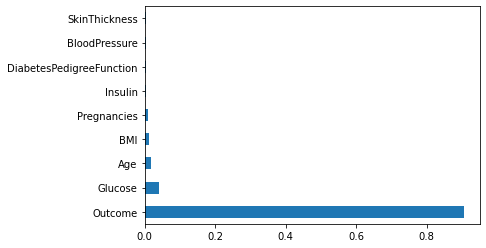

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
X = diabetes.iloc[:,0:20]
y = diabetes.iloc[:,-1]

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

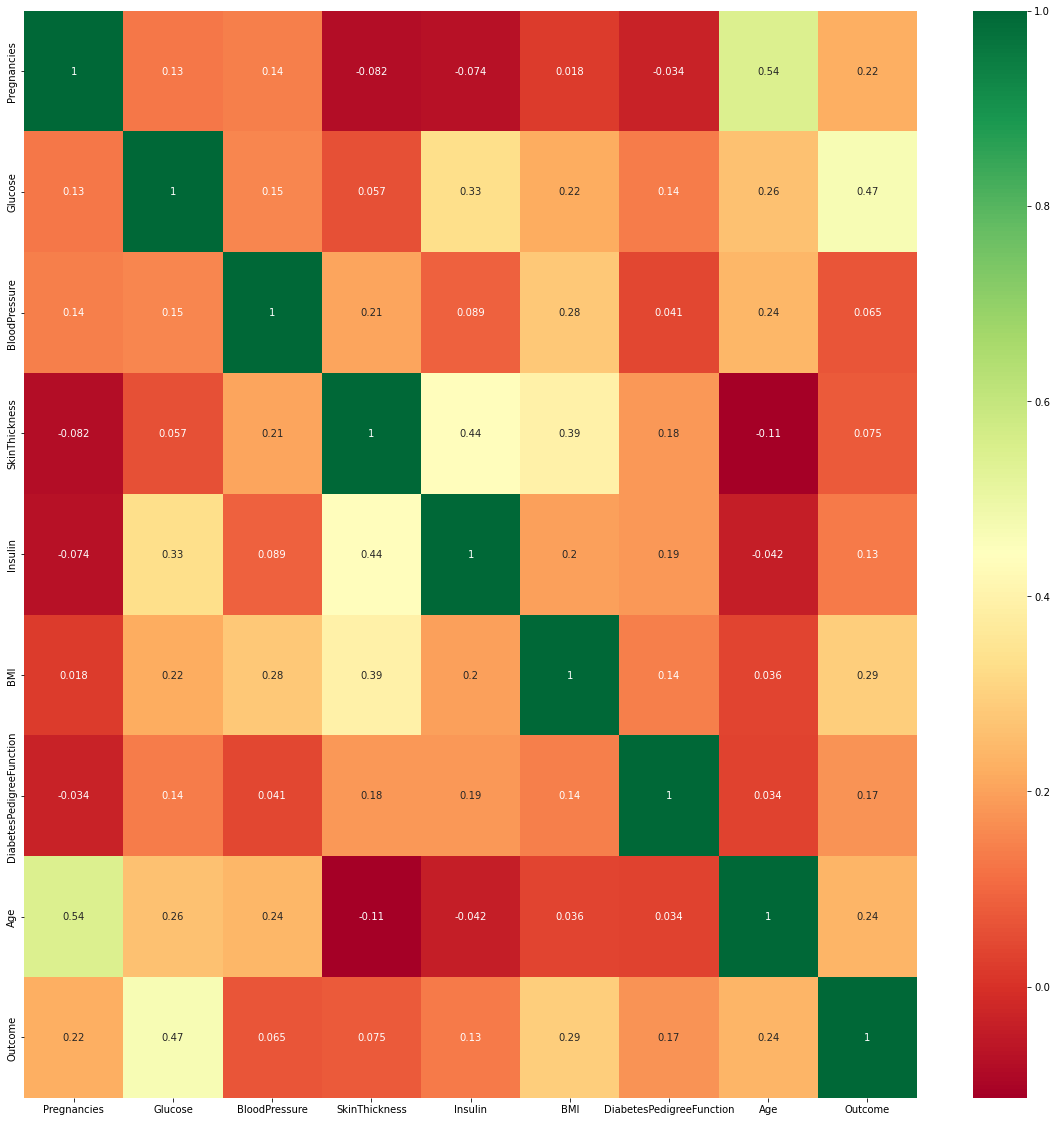

In [14]:
X = diabetes.iloc[:,0:20]
y = diabetes.iloc[:,-1]

corrmat = diabetes.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(diabetes[top_corr_features].corr(), annot=True, cmap="RdYlGn")

<AxesSubplot:>

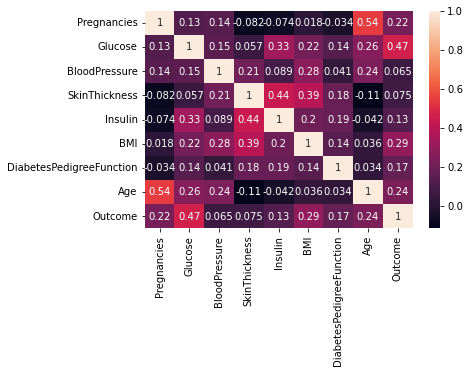

In [15]:
sns.heatmap(diabetes.corr(),annot=True)

# DATA CLEANING

In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path="C:/Users/User/Documents/datmin/diabetes.csv"
diabetes=pd.read_csv(path)

In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [147]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [148]:
to_drop = ['DiabetesPedigreeFunction', 
            'Age']

diabetes.drop(columns=to_drop, inplace=True)

In [10]:
diabetes['Outcome'].is_unique
True

True

In [150]:
diabetes = diabetes.set_index('Outcome')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI
Outcome,,,,,,
1,6,148,72,35,0,33.6
0,1,85,66,29,0,26.6
1,8,183,64,0,0,23.3
0,1,89,66,23,94,28.1
1,0,137,40,35,168,43.1


In [49]:
diabetes.loc[206]

Pregnancies                   8.000
Glucose                     196.000
BloodPressure                76.000
SkinThickness                29.000
Insulin                     280.000
BMI                          37.500
DiabetesPedigreeFunction      0.605
Age                          57.000
Outcome                       1.000
Name: 206, dtype: float64